# Coding Lab 2
## Packages, ndarrays, Plotting, and Numerical Integration
## Stellar Population Synthesis
### ASTR-4302, Prof. Faus
### **Due 2024 Sep 27, Start of Class**

Send to michael.fausnaugh@ttu.edu, with your name in the filename.

In this coding lab, we will learn about high-level data structures that are useful for scientific programming. We will also learn how to make plots and figures using Python.

We will use these coding tools to try to disentangle the contribution of several stellar populations from a galaxy spectrum.

**Full Effort:** To receive a check, you need to demonstrate full effort. You should run your code in every cell (`Shift+Enter`). If the code raises an error, you should try to debug it. 

If you try to debug things for 2 or 3 hours but can't get it to work, make a note of where you stopped with a comment or print function in the cell. Explain in one or two sentences what the error or problem that you are seeing is and what confusion(s) it is causing you.

If you don't give an explanation of why there are errors in your code cells or why you did not complete the notebook, you will receive a check-minus.

A check-plus is worth extra credit---one check-plus balances a check-minus. So a check-plus gives you an extra 1.5 percentage points on your final grade. If you want to aim for extra-credit, you have until Friday (Feb. 23) at 10am to work on the coding lab. It is worth saying that I will help you with the coding lab if you bring it to office hours or make an appointment.

### 1. Packages

A package is some set of useful code or software tools that someone has devleoped and made available. In python, there are a lot of freely-available packages. You can find a large list of packages on the Python Package Index, PyPI: https://pypi.org/. 

A Package is sometimes also called a "module" or a "library." Especially in other languages (like C), libraries are a common term.  In some cases, there are technical meanings; for example, a python package is usually made up of one or more modules. But the basic idea for all of these terms (package, module, or library) is that these are extensions to the core language that give you more tools.

Two very important packages for scientific computing in python are `numpy` and `matplotlib`. `numpy` is short for Numeric Python. `matplotlib` is a package that will plot data for you.

Both packages are very large, in terms of the number of tools and functions that are avaialbe. The packages also have a large userbase and developer base, and you can find a lot of documentation and help for using these pacakges. You should know about the websites, in case you need to find help or read the manuals:

https://numpy.org/

https://matplotlib.org/

It is worth saying that there are other packages out there that do similar things, if not the same things, as these two. But `numpy` and `matplotlib` are probably the most standard and well-known packages for scientific computing in python.

A great thing about python is that it is very easy to use packages. To access the tools, you use an `import` command, like this:


In [2]:
import numpy
import matplotlib
print("success, move to the next cell.")

success, move to the next cell.


This gives you access to all of the tools in numpy or matplotlib. You access them with a `.`, for example

In [3]:
x = [1,2,3]
y = [2,4,8]
dot_product = numpy.dot(x,y)
print(dot_product)

34


So, this function called `numpy.dot` calculated the dot product for 2 lists, x and y.  This function is part of the `numpy` package; in general, you need to know about/learn functions in numpy to make the best use of it.

We will do some practice with `matplotlib` a bit further down.

It is tedious to keep typing `numpy` or `matplotlib`. You can rename any package when you import it in python. In principle, you can name things whatever you want. People usually change `numpy` to `np`, with the following command:

In [4]:
import numpy as np

x = [1,2,3]
y = [2,4,8]
dot_product = np.dot(x,y)
print(dot_product)

34


The best thing to do is to import all of your tools at the very start of your program or notebook---we have already taken care of the imports for this notebook.

**Exercise:** In the cell below, use numpy to calculate the cross product of two lists. Is the result correct?

In [12]:
x = [1,2,3]
y = [2,4,8]

#calculate cross product here.



### 2. Data Structures and the ndarray

Most packages give you new functions and new data structures. We already encountered one kind of data structure, the list.  Remember, for example, that we can add objects to a list in the following way:

In [5]:
sample_list = [1,2.2, 3.3]
print('print statement 1:',sample_list)

for ii in range(5):
    sample_list.append(4.4 + ii*1.1)
print('print 2, after appending elements',sample_list)

print statement 1: [1, 2.2, 3.3]
print 2, after appending elements [1, 2.2, 3.3, 4.4, 5.5, 6.6000000000000005, 7.700000000000001, 8.8]


A list can do other things as well:

In [8]:
#add an element to the middle of a list

#first argument of `insert` is the index number, second element is the thing you want to insert
sample_list.insert(2, 9.9)

#here, you will see that `9.9` has been put in the 3rd place in the list
print('Contents of sample list after inserting 9.9 in the 3rd index:')
print(sample_list)

#sort the list
#there is a function called sort, you call it with no arguments and it will sort your data structure
sample_list.sort()
print('Contents of sample list after sorting:')
print(sample_list)

Contents of sample list after inserting 9.9 in the 3rd index:
[1, 2.2, 9.9, 3.3, 4.4, 5.5, 6.6000000000000005, 7.700000000000001, 8.8, 9.9]
Contents of sample list after sorting:
[1, 2.2, 3.3, 4.4, 5.5, 6.6000000000000005, 7.700000000000001, 8.8, 9.9, 9.9]


In some ways, what makes a list a data structure is that (a) it serves as a container for the data, and (b) gives you functions to do things with the data.

Two shortcomings of lists are (1) math and function operations are hard, because you have to look up the elements of the list with the index; so usually you do operations on lists in a loop. (2) Looping over a list in python is not very efficient; it can be slow to do a loop over millions of elements in a list.

In [9]:
#If I want to add 100 to every element in the list, I have to do this:
for ii in range(len(sample_list)):
    sample_list[ii] = sample_list[ii] + 100
print(sample_list)


#but this code will cause a TypeError
sample_list + 100


[101, 102.2, 103.3, 104.4, 105.5, 106.6, 107.7, 108.8, 109.9, 109.9]


TypeError: can only concatenate list (not "int") to list

However, `numpy` has a special data structure called the `ndarray`, which fixes both of these problems. `ndarrays` make math very easy for a collection of data elements. `ndarray` objects are also super efficient, and can do lots of operations across the array quickly. (Under the hood, a lot of `numpy` is written in C, which runs very quickly on loops.)

In [10]:
#We can build an ndarray in different ways. For example, we can convert a list to an ndarray
print(type(sample_list))
sample_array = np.array(sample_list)
print(type(sample_array))
print(sample_array)
print(sample_array + 100)

<class 'list'>
<class 'numpy.ndarray'>
[101.  102.2 103.3 104.4 105.5 106.6 107.7 108.8 109.9 109.9]
[201.  202.2 203.3 204.4 205.5 206.6 207.7 208.8 209.9 209.9]


`ndarrays` get even better. If you want to do operations on ndarrays of the same size, `numpy` matches elements, one at a time.  This is called "vectorization." It makes our code much easier ot read, because we don't need to loop over the data structs. We can also assign a variable name to an ndarray and use it in an equation.

In [ ]:
#in the last coding lab, we caulculated the area of an ellipse like this.
major_axis = [1.1, 2.2, 3.3, 4.4 ]
minor_axis = [0.1, 0.2, 0.3, 0.4 ]
#BTW, numpy has some built in constants, like pi
#so we don't need to define it for ourselves
#pi = 3.14159
print(np.pi)

for ii in range(len( major_axis)):
    major_axis_use = major_axis[ii]
    minor_axis_use = minor_axis[ii]
    area_of_ellipse = np.pi*major_axis_use*minor_axis_use
    
    print('area of ellipse ', ii,':  ', area_of_ellipse)


#Notice how much easier it is with ndarrays 
major_axis = np.array([1.1, 2.2, 3.3, 4.4 ])
minor_axis = np.array([0.1, 0.2, 0.3, 0.4 ])
areas = np.pi*major_axis*minor_axis
print(areas)

#The ndarrays also do the arithmetic faster than the lists. 
#We might notice this if we tried to do operations on a lists with a million elements or so

**Exercise:** In the cell below, calculate the squares for all numbers in the given ndarray

In [11]:
x = np.array([0,1,2,3,4,5,6,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30])

#calcualte the squares of all elements in x here:



By default, you should usually plan to use ndarrays in `numpy`. When doing data science with python or scientific computing, ndarrays are one of the best options. (I would argue they are the best overall, but that is an opinion.)

Here are some other important and useful numpy functions.  See also the `numpy` tutorial for beginners (https://numpy.org/doc/stable/user/absolute_beginners.html) and `numpy` fundamentals (https://numpy.org/doc/stable/user/basics.html).

In [13]:
#ways to make an ndarray:

#make a new array. The two arguments set the begining and end
new_array1 = np.arange(1,11)
print('new_array1:',new_array1)

#the third argument sets the spacing
new_array2 = np.arange(1,11, 0.2)
print('new_array2:',new_array2)

#if you don't know the spacing but know the number of elements that you want
#use np.linspace
#in this case, we make it with 30 elements, evenly spaced
new_array3 = np.linspace(1,11,30)
print('lenght of new_array3:',len(new_array3))
print('new_array3:',new_array3)


#make a new array that is all ones or zeros
#the argument gives the size of the array you need)
array_of_zeros = np.zeros(10)
print('array_of_zeros:',array_of_zeros)

array_of_ones = np.ones(15)
print('array_of_ones',array_of_ones)



new_array1: [ 1  2  3  4  5  6  7  8  9 10]
new_array2: [ 1.   1.2  1.4  1.6  1.8  2.   2.2  2.4  2.6  2.8  3.   3.2  3.4  3.6
  3.8  4.   4.2  4.4  4.6  4.8  5.   5.2  5.4  5.6  5.8  6.   6.2  6.4
  6.6  6.8  7.   7.2  7.4  7.6  7.8  8.   8.2  8.4  8.6  8.8  9.   9.2
  9.4  9.6  9.8 10.  10.2 10.4 10.6 10.8]
lenght of new_array3: 30
new_array3: [ 1.          1.34482759  1.68965517  2.03448276  2.37931034  2.72413793
  3.06896552  3.4137931   3.75862069  4.10344828  4.44827586  4.79310345
  5.13793103  5.48275862  5.82758621  6.17241379  6.51724138  6.86206897
  7.20689655  7.55172414  7.89655172  8.24137931  8.5862069   8.93103448
  9.27586207  9.62068966  9.96551724 10.31034483 10.65517241 11.        ]
array_of_zeros: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
array_of_ones [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


**Exercise**: In the cell below, make an array of 10 numbers evenly spaced between 10 and 1000. Then make a second array of 10 numbers logarithmically spaced between 10 and 1000.

In [ ]:
#make arrays here.



Here are examples of mathematical functions used with `numpy`:

In [14]:
#numpy functions to act on ndarrays
#really easy to do a lot of math
x = np.arange(1,11)
print('log_10 of x', np.log10(x))
print('log of x',    np.log(x))
print('sqrt(x)',     np.sqrt(x))
print('x^2', np.power(x,2))
print('e^x', np.exp(x))


log_10 of x [0.         0.30103    0.47712125 0.60205999 0.69897    0.77815125
 0.84509804 0.90308999 0.95424251 1.        ]
log of x [0.         0.69314718 1.09861229 1.38629436 1.60943791 1.79175947
 1.94591015 2.07944154 2.19722458 2.30258509]
sqrt(x) [1.         1.41421356 1.73205081 2.         2.23606798 2.44948974
 2.64575131 2.82842712 3.         3.16227766]
x^2 [  1   4   9  16  25  36  49  64  81 100]
e^x [2.71828183e+00 7.38905610e+00 2.00855369e+01 5.45981500e+01
 1.48413159e+02 4.03428793e+02 1.09663316e+03 2.98095799e+03
 8.10308393e+03 2.20264658e+04]


### 3. Plotting

The package for plotting is `matplotlib`. Plotting is quite complicated, because you need some software that controls what pixel data the computer knows about, some software that knows how to draw x-y values in terms of pixels, some other software that translate x-y and pixels for the computer, and yet more software that controls how the computer tells the display device (your screen or monitor) to draw the data. 

In many cases, the scientist doesn't care at all about these things, so a popular model is to separate software tools that the user will use from all of the backend stuff that lets the computer draw graphics. Matplotlib works in this way:

In [15]:
#import matplotlib tools---this does all the graphics and translations for graphics
import matplotlib

#set default size of the figures
matplotlib.rcParams['figure.figsize'] = (4,4)

#this line tells python to draw the plots inside of this jupyter notebook. 
#So when you plot something, it displays below the code cell
%matplotlib inline


#all of the user tools are in a module (library) called matplotlib.pyplot. 
#It is customary to call this set of tools `plot`
import matplotlib.pyplot as plt
print('success, continue to next cell')

success, continue to next cell


The key function in `pyplot` is called `plot` (invoked with `plt.plot`). This function takes as the first argument the x-values (in a list or ndarray) and as the second argument the y-values.

There are also **keywords** in the plot function, which are variables that are set when a function is called.

In `pyplot`, you can change the way the plot looks using the keywords.

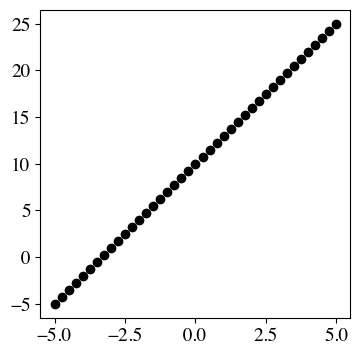

In [16]:
#plot a straight line, with slope of 3 and y-intercept of 10
x = np.arange(-5,5.25,0.25)
y = 3*x + 10

#black circles with no connections
plt.plot(x,y,color='black', marker='o', linestyle="None")

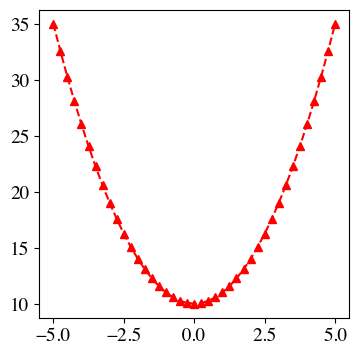

In [17]:
#plot a parabola with y-intercept of 10
x = np.arange(-5,5.25,0.25)
y = x**2 + 10

#red stars with dashed line connection
plt.plot(x,y,color='red', marker='^', linestyle="--")

You can plot several lines in the same figure.  

There are also functions to change the x and y axis, and add labels.

You can also make a legend.

Here are examples of all three:

Text(0.5, 0, 'x-coordinate')

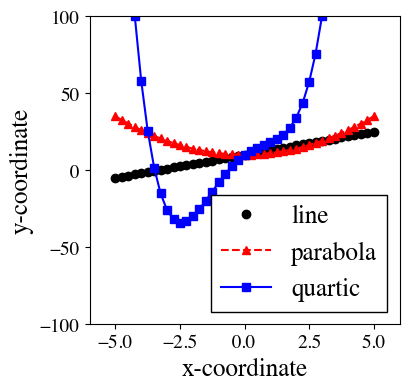

In [18]:
x = np.arange(-5,5.25,0.25)

line = 3*x + 10
parabola = x**2 + 10
quartic = x**4 + x**3 - 6*x**2 +  12*x + 10

#We add the "label" keyword, as the string that will
#appear in the legend
plt.plot(x, line, color='black', marker='o',linestyle="None", label="line")

plt.plot(x, parabola, color='red', marker='^', linestyle="--", label="parabola")

#the 's' is for square
plt.plot(x, quartic, color='blue', marker='s', linestyle="-", label="quartic")

#loc means "location"
plt.legend(loc="lower right")

#ylimit and xlimit of the axes
plt.ylim([-100,100])
plt.xlim([-6,6])

#x and y labels of the axes
plt.ylabel('y-coordinate')
plt.xlabel('x-coordinate')

**Exercise:** In the cell below, make an array with 100 elements evenly spaced between 0 and 1.  Call this array `x`.  Then plot the following functions, all in one figure:
$$
y = x\\
y = x^2\\
y = \sqrt{x}\\
y = \sin(2\pi x)
$$

In [19]:
#make your array and plot the functions here:



### 4. Stellar Population Synthesis

In this coding lab, we will try to interpret galaxy spectra that contain a mixture of stellar populations. For simplicity, these will be stellar populations of the same chemical composition but different ages.


The first thing we do is pull the data to our working cloud directory. Run the code cell below and to see the galaxy spectra that we will be trying to interpret.

This will make a new folder in the working directory, which you should be able to see in the navigation panel to the left.  The numbers is a unique ID for the model run. 0218 stands for February 18th; the other number is an increment to keep track of how many people are using the online service.

Inside the directory there are several files. Stellar evolution codes calculate both the spatial-dependent part of the differential equations (which we know a lot about) and the time-dependent part (which we don't know anything about). So these directories are a mess because they have stellar models for several different times over the star's life.

I've selected the stellar model for the time that is roughly as old as our own Sun; so this is a numerical model similar to what we think is really going on in the Sun. Run the code cell below to load the data and plot radius as a function of mass coordinate.

The data are in `MESA-Web_Job_02182425344/profile8.data`. This is a text file with a lot of columns---56, to be exact. The first column is the mass coordinate, which is the independent variable. Each other column gives us everything we want to know about the star at that specific mass shell.

You can see the full list of columns here: http://user.astro.wisc.edu/~townsend/static.php?ref=mesa-web-output#Profile_Output

But I have loaded everything into ndarrays for you:

In [ ]:
#notice that it is a numpy function that knows how to load the data.
#numpy has a number of functions used to read data from csv or text files.

data =  np.genfromtxt('MESA-Web_Job_02182425344/profile8.data',skip_header=5,names=True)
mass            = data['mass'][::-1]
radius          = data['radius'][::-1]
luminosity      = data['luminosity'][::-1]
pressure        = data['pressure'][::-1]
#note that these are base_10 logarithms
log_density     = data['logRho'][::-1]
log_temperature = data['logT'][::-1]

opacity         = data['opacity'][::-1]
#energy generation
energy_gen_total= data['eps_nuc'][::-1]
#energy generation from pp-chain only
energy_gen_pp   = data['pp'][::-1]
energy_gen_cno  = data['cno'][::-1]
energy_gen_3a   = data['tri_alfa'][::-1]

#start with the simplest thing: plot radius vs mass

plt.plot(mass, radius, color='black', marker='.', linestyle='None')
plt.xlabel('mass coordinate (M$_\odot$)')
plt.ylabel('radius coordinate (R$_\odot$)')

OK, there are a lot of points, so it drew a thick line. Let's redraw it with no points, but a line connecting each data value.  Let's also plot the other variables we've been studying: pressure, density, temperature, luminosity, opacity, and energy generation

In [ ]:
plt.plot(mass, radius, color='black', marker='None', linestyle='-')
plt.xlabel('mass coordinate (M$_\odot$)')
plt.ylabel('radius coordinate (R$_\odot$)')

#makes a new figure
plt.figure()

plt.plot(mass, log_density, color='b',marker='None',linestyle='-')
plt.xlabel('mass coordinate (M$_\odot$)')
plt.ylabel('log$_{10}$ density [g/cm$^3$]')

plt.figure()
plt.plot(mass, pressure, color='c',marker='None',linestyle='-')
plt.xlabel('mass coordinate (M$_\odot$)')
plt.ylabel('Pressure (dyn/cm$^2$)')

plt.figure()
plt.plot(mass, log_temperature, color='r',marker='None',linestyle='-')
plt.xlabel('mass coordinate (M$_\odot$)')
plt.ylabel('log$_{10}$ Temperature [Kelvin]')

plt.figure()
plt.plot(mass, opacity, color='g',marker='None',linestyle='-')
plt.xlabel('mass coordinate (M$_\odot$)')
plt.ylabel('opacity (cm$^2$ /g)')


plt.figure()
plt.plot(mass, luminosity, color='m',marker='None',linestyle='-')
plt.xlabel('mass coordinate (M$_\odot$)')
plt.ylabel('Luminosity  (L$_\odot$)')

plt.figure()
plt.plot(mass, energy_gen_total, color='orange',marker='None',linestyle='-')
plt.xlabel('mass coordinate (M$_\odot$)')
plt.ylabel('$\epsilon_{\\rm nuclear}$ (erg/g/s)')



### 5. Questions

1) Qualitatively, what do you notice when comparing the temperature figure to the oppacity figure? What do you notice when comparing the luminsoity plot to the energy generation plot? Write your answer in 1--4 complete sentences below (use either comments or the print function).

In [ ]:
#put your answer in this cell




2) **Numerical Intetgration.** The equation for mass conservation is
$$ dm = 4\pi\rho(r)r^2\,dr $$
so the total mass is
$$ M = \int_0^Mdm = \int_0^R 4\pi \rho(r) r^2\, dr$$
On the other hand, an integral is defined as
$$\int f(x)dx = \lim_{\Delta x -> 0} \sum_i f(x_i)\Delta x_i $$
which means you can approximate an integral by summing up many small rectangles with width $\Delta x$ and height $f(x)$.
Computers are very good at repetitively summing things, and numpy has functions to do the rectangle-summing for you. This approach is called Numerical Integration. For example, you can verify that the following code is an excellent approximation for this definite integral:
$$\int_0^3 x^3\,dx = \left[ \frac{x^3}{3}\right]_0^3 = 9$$
(after running this code cell below, proceed to the next cell)

In [ ]:
#make x values between 0 and 3, with 1000 samples 
x = np.linspace(0,3,1000)
#evaluate function at these values
rectangle_heights = x**2

#np.trapz is trapezoidal numerical integration. For the heights of the reactangles, 
#you average f(x1) and f(x2)
#the first argument is the function values, the second argument is the x-values.

area = np.trapz(rectangle_heights,x)
print('the numerical integration gives:',area)

print('continue to next code block')

Using `np.trapz`, numerically integrate the density profile (ndarray variable called density `density`) and verify that the total stellar mass is about 1 solar mass.

In [ ]:
#use the `density` ndarray and the `radius` ndarray to calculate the integrand at each radius
density = np.power(10,log_density) #remove log, density is in g/cm^3
radius_cm = radius*6.89e10 #convert solar radius to cm
#use these variables
print(len(density))
print(len(radius_cm))

#######################################################
#calculate what the heights of the reactangles are here
rectangle_heights = 
#######################################################

total_mass = np.trapz(rectangle_heights, radius_cm)

print("The total mass in grams is:",total_mass)

3) Along the same lines, we can numerically integrate the equation for hydrostatic equillibrium to get the pressure at the core:
   $$\int_{P_{\rm core}}^0 \frac{dP}{dm}\,dm = -P_{\rm core} = \int_0^M -\frac{Gm}{4\pi r^4}\,dm $$.

   Using `np.trapz`, numerically integrate $Gm/4\pi r^4$ and confirm that your answer is close to the central pressure.

In [ ]:

mass_g = mass*1.9885e33 #convert to grams
radius_cm = radius*6.89e10 #convert solar radius to cm

#use these variables
G = 6.67e-8 #cgs units
print(len(mass_g))
print(len(radius_cm))

#######################################################
#calculate what the heights of the reactangles are here
rectangle_heights = 
#######################################################

central_pressure = np.trapz(rectangle_heights, mass_g)

print("The central pressure in dyn/cm^2 is :",central_pressure)
print("The central pressure from the model is",pressure[0], "(pressure were r is ",radius[0],")")

(4) Consider the nuclear energy generation rate, which is the sum of all the nuclear reactions $\epsilon = \epsilon_{pp} + \epsilon_{CNO} + \epsilon_{3\alpha}$. 

- Plot the star's profile for all three energy generations rates in one figure.
- Based on this plot, at what fraction of the way through the star has most of the energy generation ceased? What does this imply for nuclear reactions in the outler layers of the star? Give your answers in comments or print statements in the following cell block.
- You can use another numpy function `np.sum` to add up the energy generation rate across mass shells. What fraction of the total energy generation rate is from the CNO cycle? What fraction is from the triple alpha process?

In [ ]:
#use these variables
print(len(energy_gen_total))
print(len(energy_gen_pp))
print(len(energy_gen_cno))
print(len(energy_gen_3a))

#part a
#here is a template for you to copy. 
#You need to plot the other three ndarrays
plt.plot(mass, energy_gen_total,'orange',marker='None',linestyle='-',label='Total')


plt.legend(loc='upper right')
plt.xlabel('mass coordinate (M$_\odot$)')
plt.ylabel('$\epsilon_{\\rm nuclear}$ (erg/g/s)')

#part b
##replace text below with your answers
print("The energy generation has mostly ceased by M = ", )
print("comment on nuclear reactions in out parts of the star")

#part c
#this is how you use the `np.sum` function
#to add up the total energy generation rate through the star.
e_star = np.sum(energy_gen_total)

#you need to figure out how to do the same thing
#for energy generation in the pp-chain, CNO cycle, and triple-alpha process


#give your answers here
print("The fraction of energy generation from the CNO cycle is: ", )
print("The fraction of energy generation from the triple-alpha process is: ", )


5) Numerically integrate
$$\int_0^M \frac{dl}{dm}\,dm = \int_0^{M} \epsilon(m)\, dm $$
and show that the result gives a number close to, but slightly larger than, the total luminosity of the star calculated by the model. Why is the energy generation rate larger than the total luminosity of the star?

In [ ]:

mass_g = mass*1.9885e33 #convert to grams
luminosity_erg_per_s = luminosity*3.823e33 #convert solar luminosity to ergs per second

#use these variables
print(len(mass_g))
print(len(luminosity_erg_per_s))
print(len(energy_gen_total)) #already in erg/s/g